In [1]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn import metrics
filepath = pathlib.PureWindowsPath(r"C:\Users\dj564225.LORAS\Downloads\archive (2)\creditcard.csv")
filepath = filepath.as_posix()
df = pd.read_csv(filepath)
print(df.shape)
df

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
false = df[df['Class'] == 1]
true = df[df['Class'] == 0]
print("Fraud Cases",len(df[df['Class'] == 1]))
print("Non-Fraud Cases",len(df[df['Class'] == 0]))

Fraud Cases 492
Non-Fraud Cases 284315


<Axes: xlabel='Time', ylabel='Amount'>

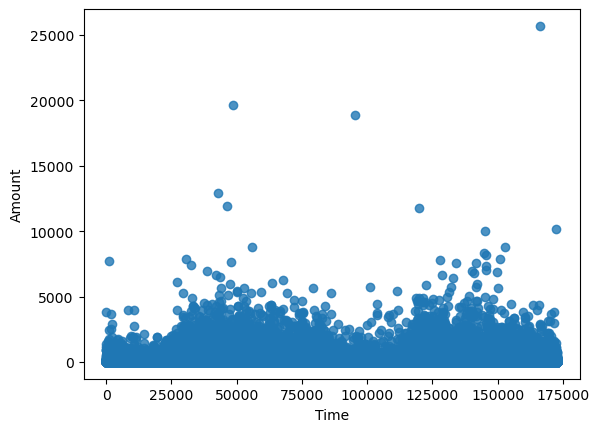

In [3]:
import seaborn as sns

sns.regplot(x='Time', y='Amount', data=df)

C:\Users\dj564225.LORAS\AppData\Local\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1800x1500 with 0 Axes>

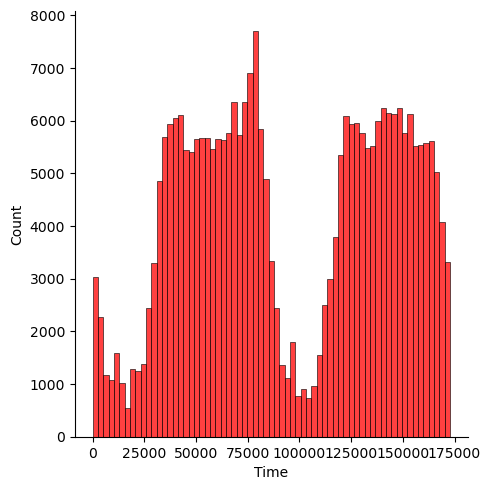

In [4]:
pd.option_context('mode.use_inf_as_na', True)
plt.figure(figsize=(18,15))
sns.displot(df['Time'], color='red')

<function matplotlib.pyplot.show(close=None, block=None)>

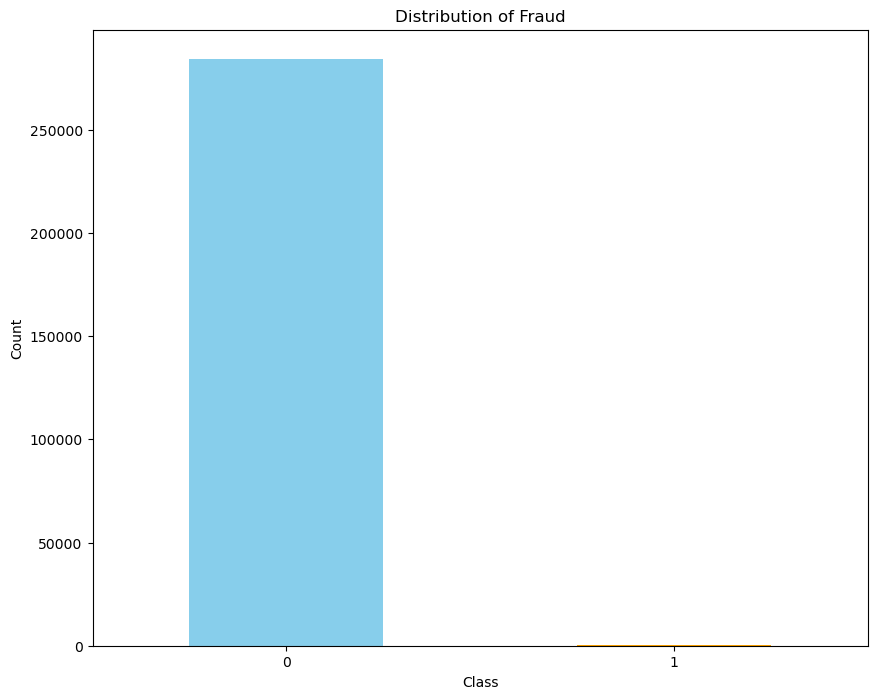

In [5]:
x = df.drop('Class', axis=1)
y = df['Class']
plt.figure(figsize=(10, 8))
df['Class'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Fraud')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show

In [6]:
pd.concat([false.Amount.describe(), true.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [7]:
#pd.concat([false.Time.describe(), true.Time.describe()], axis=1)

In [8]:
#Split up data into test and training
scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [9]:
#1 LogisticRegression model 
model = LogisticRegression()
model.fit(x_train, y_train)

model_train = model.predict(x_train)
model_test = model.predict(x_test)

scores_dict = {}
scores_dict['LogisticRegression'] = {
    'Train': f1_score(y_train, model_train),
    'Test': f1_score(y_test, model_test)}

In [10]:
import xgboost as xgb
#2 XGboost model

xgb = xgb.XGBClassifier(max_depth = 4)
xgb.fit(x_train, y_train)

xgb_train = xgb.predict(x_train)
xgb_test = xgb.predict(x_test)

scores_dict['XGBoost'] = {
    'Train': f1_score(y_train, xgb_train),
    'Test' : f1_score(y_test, xgb_test),}

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

#3 DecisionTreeClassifier model

classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(x_train, y_train)

predicted_train = classifier.predict(x_train)
predicted_test = classifier.predict(x_test)

scores_dict['DecisionTree'] = {
    'Train': f1_score(y_train, predicted_train),
    'Test': f1_score(y_test, predicted_test)}

print("\n Accuracy score : ",scores_dict)


 Accuracy score :  {'LogisticRegression': {'Train': 0.7386172006745364, 'Test': 0.6666666666666666}, 'XGBoost': {'Train': 1.0, 'Test': 0.8487084870848708}, 'DecisionTree': {'Train': 0.864, 'Test': 0.8102189781021897}}


<Axes: >

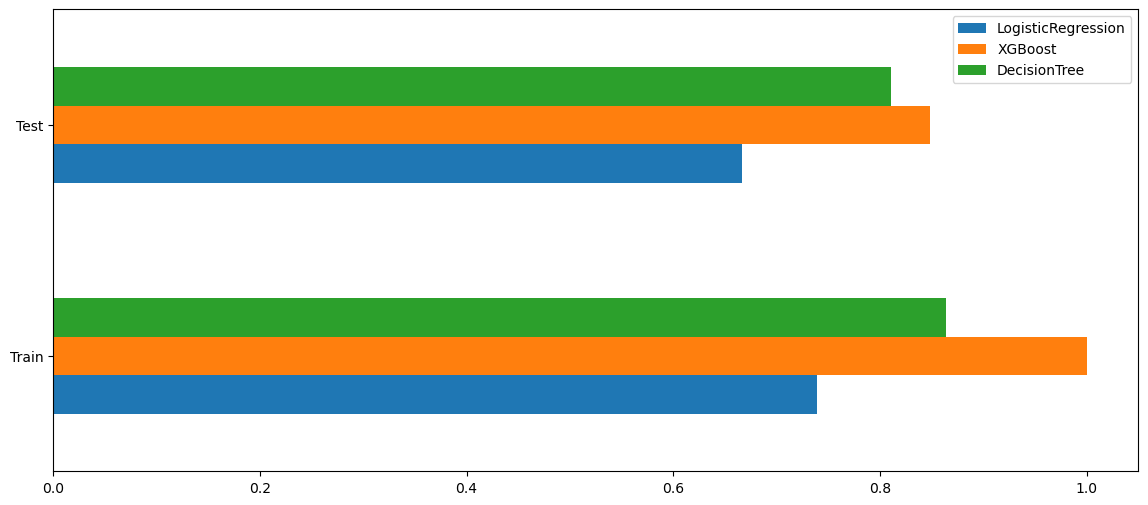

In [12]:
scores_df = pd.DataFrame(scores_dict)
scores_df.plot(kind='barh', figsize=(14, 6))